In [33]:
import json 
import numpy as np 
import pandas as pd 
from pathlib import Path 


mod_chats = [55, 784, 1014, 1068, 332, 410, 476, 51, 68, 132] 
nvc_chats = [1444, 1322, 1141, 570, 126, 858, 785, 696, 572, 444] 

survey_questions = {
    "How Coherent was the conversation?": "coherency",
    "How likely are you to continue chatting with the moderator?": "engaging",
    "To what degree did the moderator understand your point of view?": "understanding",
    "To what degree did the moderator convince you to change your behavior?": "convincing"
}

score_mapping = {
    'Not at all': 0, 
    'Mostly not': 1, 
    'So-so': 2, 
    'Somewhat': 3, 
    'Very': 4
}

base_data_dir = "/home/darma/work/boteval.prod/darma-task/data-prod/data/"
# fn = f"{base_data_dir}20230109/20230109-071750-chat476_28.json"

In [42]:
dates = [20230107, 20230108, 20230109]

data_folders = [p for p in Path(base_data_dir).glob("*") if int(p.name) in dates]
data_files = [] 
for folder in data_folders: 
    fns = folder.glob("*.json")
    data_files.extend(fns)
    
len(data_files)

127

In [81]:
def get_data_of_interest(mturk_fn): 
    
    with open(mturk_fn) as f: 
        data = json.load(f)

    # chat number 
    chat_num = mturk_fn.name.split("chat")[-1].split("_")[0]

    # get ratings
    ratings= data['data']['ratings']
    ratings = {survey_questions[k]: int(v) for k, v in ratings.items()}
    # get user 
    worker_id = data['data']['mturk']['worker_id']
    #get bot type:
    bot_type = "Moderator bot" if int(chat_num) in mod_chats else "NVC bot"
    if bot_type == "NVC bot": 
        assert int(chat_num) in nvc_chats, chat_num 

    # get conversation 
    messages = data['messages']
    
    chat_num, bot_type, worker_id, ratings
    return {
        "topic_id": chat_num, 
        "bot_type": bot_type, 
        "worker_id": worker_id, 
        "messages" : messages, 
        **ratings
    }

In [82]:
pd_list = [ get_data_of_interest(fn) for fn in data_files ] 

In [92]:
pd_list[0]['messages']

def get_human_bot_number_words(messages):
    human = 0 
    bot = 0 
    for msg in messages: 
        if msg['user_id'] == "context": 
            continue 
        if msg['user_id'] == "bot01": 
            bot += len(msg['text'].split())
        else: 
            human += len(msg['text'].split())
            
    return human, bot 

get_human_bot_number_words(pd_list[0]['messages'])
            

(123, 501)

In [93]:
for list_item in pd_list: 
    human, bot = get_human_bot_number_words(list_item['messages'])
    list_item["human_words"] = human 
    list_item["bot_words"] = bot 

In [94]:
pd.set_option('display.max_colwidth', -1)
df.groupby("bot_type").agg(["mean", "median", "std", "count"])[['coherency', 'engaging', 'understanding', 'convincing']]

/tmp/ipykernel_1013495/2618719938.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/tmp/ipykernel_1013495/2618719938.py:2: FutureWarning: ['worker_id', 'messages'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("bot_type").agg(["mean", "median", "std", "count"])[['coherency', 'engaging', 'understanding', 'convincing']]


coherency                         engaging                   \
                   mean median       std count      mean median       std   
bot_type                                                                    
Moderator bot  3.359375  4.0    1.515708  64    1.453125  1.0    0.733110   
NVC bot        3.920635  4.0    1.154257  63    1.968254  2.0    1.163535   

                    understanding                        convincing         \
              count          mean median       std count       mean median   
bot_type                                                                     
Moderator bot  64    1.781250      1.0    0.967221  64    1.828125   1.0     
NVC bot        63    2.619048      2.0    1.349176  63    2.587302   2.0     

                               
                    std count  
bot_type                       
Moderator bot  1.175878  64    
NVC bot        1.432738  63

In [97]:
# word count comparison 
df.groupby("bot_type").agg(["mean", "median", "std", "count"])[['human_words', 'bot_words']]


/tmp/ipykernel_1013495/4108260773.py:1: FutureWarning: ['worker_id', 'messages'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("bot_type").agg(["mean", "median", "std", "count"])[['human_words', 'bot_words']]


human_words                           bot_words         \
                     mean median        std count        mean median   
bot_type                                                               
Moderator bot  67.828125   56.5   36.828886  64    320.703125  330.0   
NVC bot        86.301587   75.0   42.807007  63    449.650794  469.0   

                                 
                      std count  
bot_type                         
Moderator bot  75.025431   64    
NVC bot        108.179385  63

In [91]:
df = pd.DataFrame(pd_list)

In [80]:
df.groupby("worker_id").agg(["count"])['topic_id']

,count
worker_id,
A1E77HZO63E334,1
A1ELPYAFO7MANS,19
A1FNNL4YJGBU8U,4
A1HKYY6XI2OHO1,18
A1OZPLHNIU1519,1
A1SX8IVV82M0LW,1
A1XUZFDVKP95VC,1
A28AXX4NCWPH1F,2
A2C85B8E3K4TIW,8


In [76]:
pd.set_option('display.max_colwidth', -1)
df.groupby("bot_type").agg(["mean", "median", "std", "count"])[['coherency', 'engaging', 'understanding', 'convincing']]

/tmp/ipykernel_1013495/2618719938.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/tmp/ipykernel_1013495/2618719938.py:2: FutureWarning: ['worker_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("bot_type").agg(["mean", "median", "std", "count"])[['coherency', 'engaging', 'understanding', 'convincing']]


coherency                         engaging                   \
                   mean median       std count      mean median       std   
bot_type                                                                    
Moderator bot  3.359375  4.0    1.515708  64    1.453125  1.0    0.733110   
NVC bot        3.920635  4.0    1.154257  63    1.968254  2.0    1.163535   

                    understanding                        convincing         \
              count          mean median       std count       mean median   
bot_type                                                                     
Moderator bot  64    1.781250      1.0    0.967221  64    1.828125   1.0     
NVC bot        63    2.619048      2.0    1.349176  63    2.587302   2.0     

                               
                    std count  
bot_type                       
Moderator bot  1.175878  64    
NVC bot        1.432738  63

In [64]:
mean_results ={} 
for row in df.groupby("bot_type").agg(["mean", "count"]).iterrows(): 
    mean_results[row[0]] = {
        'coherency': row[1]['coherency']['mean'],
        'engaging': row[1]['engaging']['mean'],
        'understanding': row[1]['understanding']['mean'],
        'convincing': row[1]['convincing']['mean']
    }
    # print(row[1]['coherency']['mean'])

/tmp/ipykernel_1013495/2192436631.py:2: FutureWarning: ['worker_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  for row in df.groupby("bot_type").agg(["mean", "count"]).iterrows():


In [67]:
mean_results

{'Moderator bot': {'coherency': 3.359375,
  'engaging': 1.453125,
  'understanding': 1.78125,
  'convincing': 1.828125},
 'NVC bot': {'coherency': 3.9206349206349205,
  'engaging': 1.9682539682539681,
  'understanding': 2.619047619047619,
  'convincing': 2.5873015873015874}}

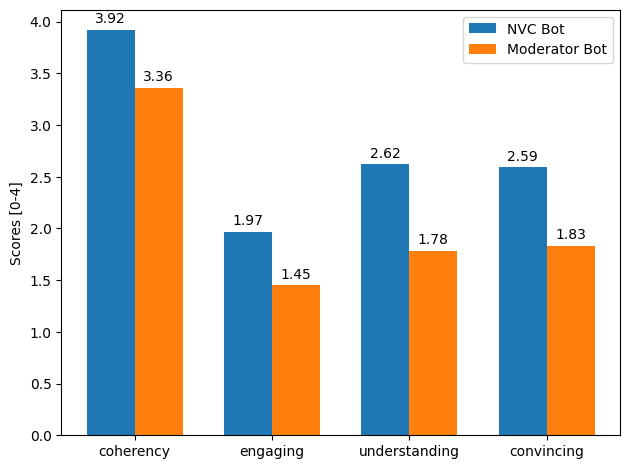

In [68]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(survey_questions.values()) 
nvc_mean = [round(mean_results["NVC bot"][prop], 2) for prop in labels]
moderator_mean = [round(mean_results["Moderator bot"][prop],2) for prop in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nvc_mean, width, label='NVC Bot')
rects2 = ax.bar(x + width/2, moderator_mean, width, label='Moderator Bot')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores [0-4]')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()